                                                        ML. DAVID SUÁREZ NIETO
                                                            BURNOUT IN EMPLOYEES                                      

**INDEX**

 1. INTRODUCTION

 2. FIRST DATA EXPLORATION

 3. DATA WRANGLING

4. EDA

5. PREPROCESSING THE DATA

        5.1. Feature engineering

6. MODELS AND PREDICTIONS

7. CONCLUSIONS

---------------

 1. INTRODUCTION

 2. FIRST DATA EXPLORATION

In [339]:
os.getcwd()
root_path=os.path.dirname(os.getcwd())
root_path
sys.path.append(root_path)
sys.path

['c:\\Users\\Master\\Documents\\contenido_bootcamp\\ML\\ML_Project\\src\\notebooks',
 'c:\\Users\\Master\\.vscode\\extensions\\ms-toolsai.jupyter-2021.10.1101450599\\pythonFiles',
 'c:\\Users\\Master\\.vscode\\extensions\\ms-toolsai.jupyter-2021.10.1101450599\\pythonFiles\\lib\\python',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\python37.zip',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\DLLs',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37',
 '',
 'C:\\Users\\Master\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib

In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from utils.functions import label_encoder
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio 
import sys
import os 
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


Source: The following analysis has been carried out from a dataset from Kaggle

In [341]:
pd.set_option('display.max_columns', None)

In [342]:
df = pd.read_csv('../data/raw/dataset_burnout.csv')

In [343]:
#df_ibm = pd.read_csv('IBM-HR-Employee-Attrition.csv')

In [344]:
# METER LAS FEATURES AL FINAL DEL TODO, CUANDO YA HAYA ENTRENADO MODELOS: "ENVIRONMENT SATISF, RELATION.SATISF, WORKLIFEBALANCE" HACIENDO UN CONCAT:df_total = pd.concat([df, df_other], axis=1) 
# Y DROPEANDO EL RESTO DE COLUMNAS, PARA VER SI EL MODELO MEJORA
# PROBAR TAMBIÉN CON EL OTRO PARA MENTAL FATIGUE SCORE Y CON EL DE HR COMMA SEPARATOR

**I am going to explore my data**

In [345]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,0,7,3,0,0,0,Graduation,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,0,6,0,0,0,Graduation,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,0,17,3,0,0,0,Post-Graduation,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,1,3,3,0,0,0,PHD,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,0,1,5,0,0,0,PHD,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


In [346]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education',
       'Date_of_Hire', 'Date_of_termination', 'Status_of_leaving',
       'Mode_of_work', 'Leaves', 'Absenteeism', 'Work_accident',
       'Source_of_Hire', 'Job_mode', 'Unnamed: 32'],
      dtype='object')

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

In [348]:
df.shape

(1470, 33)

In [349]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Higher_Education            object
Date_of_Hire                object
Date_of_termination        float64
Status_of_leaving           object
Mode_of_work                object
Leaves                       int64
Absenteeism         

In [350]:
df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,0.0
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170,NaN
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000,NaN
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000,NaN
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000,NaN
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000,NaN


 3. DATA WRANGLING

**Let´s start with DATA CLEANING**

To start with, I am going to check missing values

In [351]:
df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

The dataset contains plenty of missing values in 'Date_of_termination column' and in 'Unnamed: 32' column. Therefore, I am going to delete these columns.

In [352]:
data= df.drop(['Date_of_termination', 'Unnamed: 32'], axis=1)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,0,7,3,0,0,0,Graduation,21-01-2021,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,0,6,0,0,0,Graduation,13-03-2021,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,0,17,3,0,0,0,Post-Graduation,23-01-2021,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,1,3,3,0,0,0,PHD,25-04-2021,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,0,1,5,0,0,0,PHD,14-06-2021,Better Opportunity,WFH,5,2,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,Married,16856,1,No,11,3,0,34,3,34,1,16,Post-Graduation,05-06-1987,Salary,OFFICE,3,2,No,Job Portal,Part Time
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,Single,19045,0,Yes,14,3,0,37,2,36,4,13,Post-Graduation,20-01-1985,Work Accident,WFH,1,1,No,Walk-in,FullTime
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,Married,19586,1,No,21,4,1,36,3,36,2,13,Post-Graduation,17-02-1985,Work Accident,OFFICE,2,1,No,Recruiter,Part Time
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,Single,13872,0,No,13,3,0,38,1,37,1,8,PHD,29-06-1984,Work Environment,WFH,2,2,Yes,Job Event,Part Time


Time to check duplicated values

In [353]:
data.duplicated().sum()

0

There are not any duplicated values

In order to work only with columns I fully understand, I am going to drop two of them:

In [354]:
data= data.drop(['Date_of_Hire', 'StockOptionLevel'], axis=1)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,7,3,0,0,0,Graduation,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,6,0,0,0,Graduation,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,17,3,0,0,0,Post-Graduation,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,3,3,0,0,0,PHD,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,1,5,0,0,0,PHD,Better Opportunity,WFH,5,2,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,Married,16856,1,No,11,3,34,3,34,1,16,Post-Graduation,Salary,OFFICE,3,2,No,Job Portal,Part Time
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,Single,19045,0,Yes,14,3,37,2,36,4,13,Post-Graduation,Work Accident,WFH,1,1,No,Walk-in,FullTime
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,Married,19586,1,No,21,4,36,3,36,2,13,Post-Graduation,Work Accident,OFFICE,2,1,No,Recruiter,Part Time
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,Single,13872,0,No,13,3,38,1,37,1,8,PHD,Work Environment,WFH,2,2,Yes,Job Event,Part Time


I am going to rename some columns so as to It is easier for me to work with them:

In [355]:
data.rename(columns={'Attrition':'Burnout', 'Leaves':'Permitted_Leaves_Taken'}, inplace=True)
data

,Age,Burnout,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Permitted_Leaves_Taken,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,7,3,0,0,0,Graduation,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,6,0,0,0,Graduation,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,17,3,0,0,0,Post-Graduation,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,3,3,0,0,0,PHD,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,1,5,0,0,0,PHD,Better Opportunity,WFH,5,2,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,Married,16856,1,No,11,3,34,3,34,1,16,Post-Graduation,Salary,OFFICE,3,2,No,Job Portal,Part Time
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,Single,19045,0,Yes,14,3,37,2,36,4,13,Post-Graduation,Work Accident,WFH,1,1,No,Walk-in,FullTime
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,Married,19586,1,No,21,4,36,3,36,2,13,Post-Graduation,Work Accident,OFFICE,2,1,No,Recruiter,Part Time
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,Single,13872,0,No,13,3,38,1,37,1,8,PHD,Work Environment,WFH,2,2,Yes,Job Event,Part Time


4. EDA

         4.1 Data analysis: demographic variables

**Now I am going to do a first Data Analysis in order to preview some demographic variables**

1. Gender Distribution

In [356]:
total_female = data.Gender.value_counts()["Female"]
total_female

588

In [357]:
total_male = data.Gender.value_counts()["Male"]
total_male 

882

In [358]:
total = data["Gender"].value_counts()
total

Male      882
Female    588
Name: Gender, dtype: int64

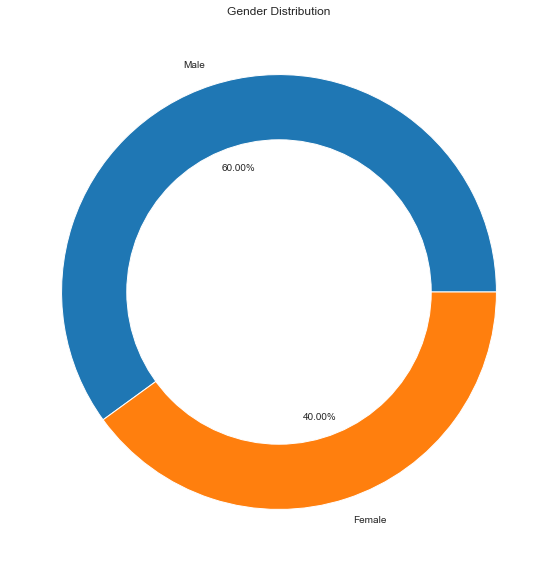

In [359]:
my_circle=plt.Circle( (0,0), 0.7, color='white') 

plt.figure(figsize=(10,10))

plt.pie(total.values,
        labels = total.index,
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Gender Distribution');


2. Age Distribution

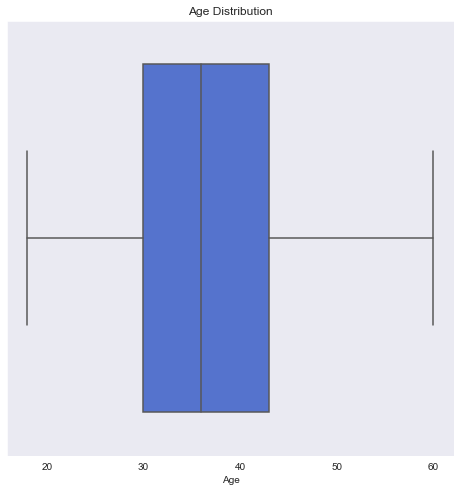

In [360]:
plt.figure(figsize=(8,8))
sns.boxplot(x=data["Age"], color='royalblue')
plt.title("Age Distribution")
plt.xlabel("Age");


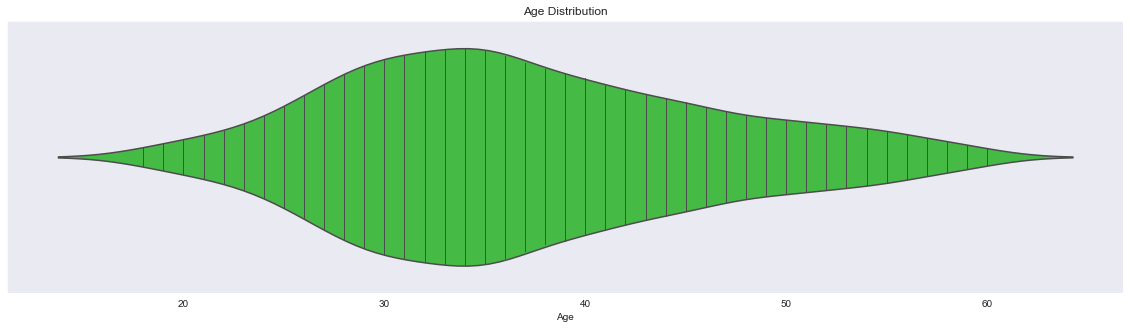

In [361]:
plt.figure(figsize=(20,5))
sns.violinplot(data['Age'], color='limegreen', inner='stick');
plt.title('Age Distribution')
plt.xlabel('Age');


In [362]:
data['Age'].value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
58    14
56    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [363]:
data['Age'].max()

60

In [364]:
data['Age'].min()

18

In [365]:
data['Age'].mean()

36.923809523809524

In [366]:
data['Age'].mode()

0    35
dtype: int64

Let´s check some other variables

Target variable (Univariant Analysis)

In [367]:
total = data["Burnout"].value_counts()
total

No     1233
Yes     237
Name: Burnout, dtype: int64

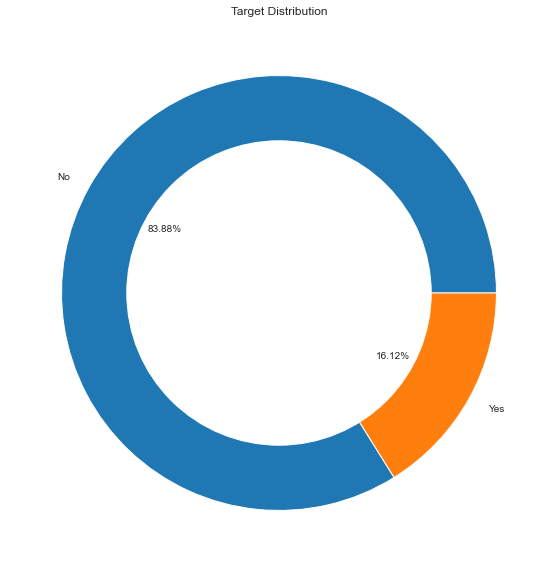

In [368]:
my_circle=plt.Circle( (0,0), 0.7, color='white') 

plt.figure(figsize=(10,10))

plt.pie(total.values,
        labels = total.index,
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Distribution');


Target variable is highly imbalanced

In [369]:
#Utilizar histplot, countplot, barplot, piechart, sunburst y swarmplot
#Cada una con Attrition
#Mirar en el de PCA de comprar para visualizar todas las features juntas

Now, it´s time to focus on bivariant analysis (Target and other features)

Once I have done the feature importance (see in the feature engineering section), I decide to visualize the relationship between the categorical variables with the highest score and the target(burnout)

1. Categorical Features with highest score (see in the feature engineering section)

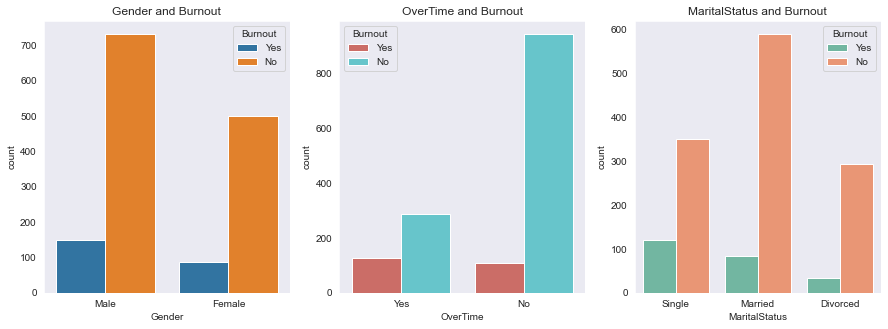

In [370]:
fig, axes = plt.subplots(1, 3,  figsize=(15, 5))

sns.countplot(data["Gender"], hue=data['Burnout'], ax=axes[0])
axes[0].set_title("Gender and Burnout")
sns.countplot(data["OverTime"], hue=data['Burnout'], palette='hls', ax=axes[1])
axes[1].set_title('OverTime and Burnout')
sns.countplot(data["MaritalStatus"], hue=data['Burnout'], palette='Set2', ax=axes[2])
axes[2].set_title('MaritalStatus and Burnout');

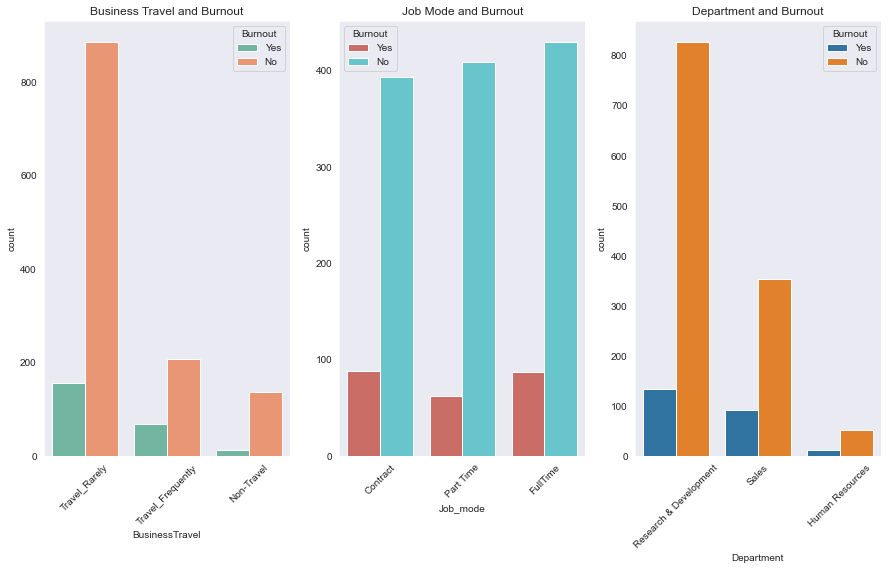

In [371]:
fig, axes = plt.subplots(1, 3,  figsize=(15, 8))

a = sns.countplot(data["BusinessTravel"], hue=data['Burnout'], ax=axes[0], palette='Set2')
axes[0].set_title("Business Travel and Burnout")
a.set_xticklabels(a.get_xticklabels(), rotation=45)
b = sns.countplot(data["Job_mode"], hue=data['Burnout'], palette='hls', ax=axes[1])
axes[1].set_title('Job Mode and Burnout')
b.set_xticklabels(b.get_xticklabels(), rotation=45)
c = sns.countplot(data["Department"], hue=data['Burnout'], ax=axes[2])
axes[2].set_title('Department and Burnout')
c.set_xticklabels(c.get_xticklabels(), rotation=45);

2. Numerical features

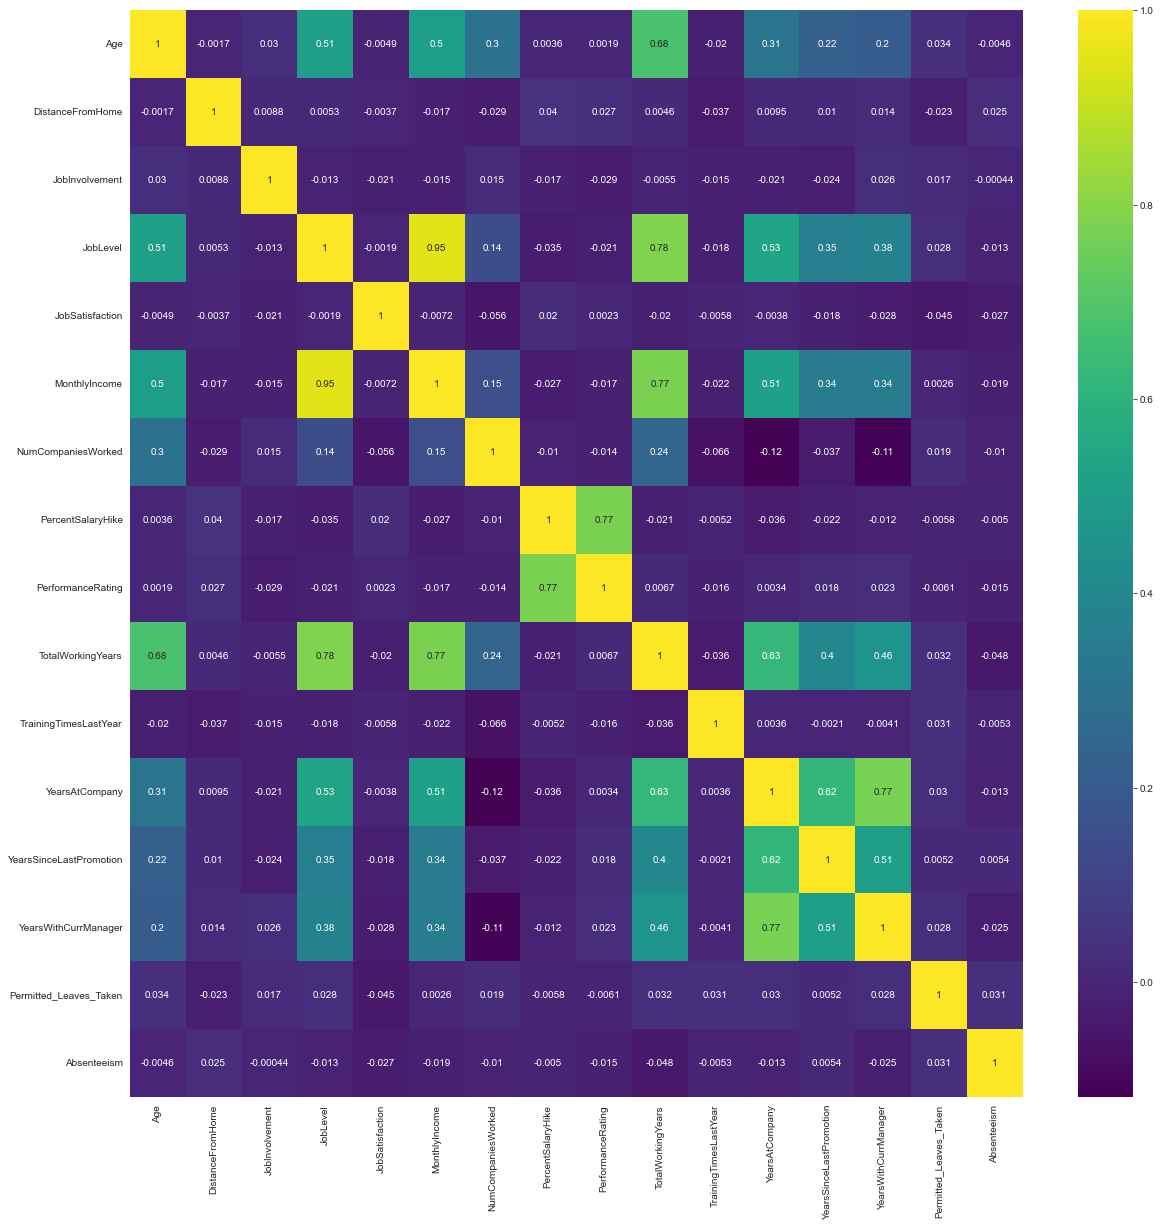

In [372]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="viridis");


Once I have analyzed the relationship, in the heatmap, between all the numeric variables with the target, I decide to deepen the visualization of that relationship

In [373]:
#HACERLO DESPUÉS, CUANDO TENGA YA HECHO EL MEJOR MODELO Y SACAR LAS MÁS IMPORTANTES CUANTITATIVAS

5. PREPROCESSING THE DATA

        5.1.Feature Engineering

Let´s check the categories in each variable!

In [374]:
#Hacer función de los unique

In [375]:
data['Burnout'].unique()

array(['Yes', 'No'], dtype=object)

In [376]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [377]:
data['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [378]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [379]:
data['JobRole'].unique()

array(['Laboratory Technician', 'Research Scientist', 'Research Director',
       'Sales Representative', 'Sales Executive', 'Manager',
       'Manufacturing Director', 'Healthcare Representative',
       'Human Resources'], dtype=object)

In [380]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [381]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [382]:
data['Higher_Education'].unique()

array(['Graduation', 'Post-Graduation', 'PHD', '12th'], dtype=object)

In [383]:
data['Status_of_leaving'].unique()

array(['Salary', 'Work Accident', 'Dept.Head', 'Better Opportunity',
       'Work Environment'], dtype=object)

In [384]:
data['Mode_of_work'].unique()

array(['OFFICE', 'WFH'], dtype=object)

In [385]:
data['Work_accident'].unique()

array(['No', 'Yes'], dtype=object)

In [386]:
data['Source_of_Hire'].unique()

array(['Job Event', 'Recruiter', 'Job Portal', 'Walk-in'], dtype=object)

In [387]:
data['Job_mode'].unique()

array(['Contract', 'Part Time', 'FullTime'], dtype=object)

1.ENCODING

These two variables can alter the result of the model score if you perform a label encoder because it misinterprets the distances. Let's develop our own values 

Mapping

In [388]:
#Hacer función de esto???

In [389]:
col         = 'BusinessTravel'
conditions  = [ data[col] == 'Non-Travel', data[col] == 'Travel_Rarely', data[col] == 'Travel_Frequently']
choices     = [ 0, 1, 2 ]
    
data['BusinessTravel'] = np.select(conditions, choices)
data['BusinessTravel'] = data['BusinessTravel']

In [390]:
col         = 'Higher_Education'
conditions  = [ data[col] == '12th', data[col] == 'Graduation', data[col] == 'Post-Graduation', data[col] == 'PHD' ]
choices     = [ 0, 1, 2, 3 ]
    
data['Higher_Education'] = np.select(conditions, choices)
data['Higher_Education'] = data['Higher_Education']

Label Encoder

In [391]:
label_encoder(data=data,column='Burnout')

In [392]:
label_encoder(data=data,column='Department')

In [393]:
label_encoder(data=data,column='Gender')

In [394]:
label_encoder(data=data,column='JobRole')

In [395]:
label_encoder(data=data,column='MaritalStatus')

In [396]:
label_encoder(data=data,column='OverTime')

In [397]:
label_encoder(data=data,column='Status_of_leaving')

In [398]:
label_encoder(data=data,column='Mode_of_work')

In [399]:
label_encoder(data=data,column='Work_accident')

In [400]:
label_encoder(data=data,column='Source_of_Hire')

In [401]:
label_encoder(data=data,column='Job_mode')

In [402]:
data

,Age,Burnout,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Permitted_Leaves_Taken,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,1,1,1,2,1,2,1,2,3,2,2090,6,1,15,3,7,3,0,0,0,1,2,0,4,2,0,0,0
1,21,0,1,1,15,1,3,1,6,4,2,1232,1,0,14,3,0,6,0,0,0,1,3,1,5,2,0,2,2
2,45,0,1,1,6,1,3,3,5,1,1,13245,4,1,14,3,17,3,0,0,0,2,1,1,1,3,0,0,0
3,23,0,1,2,2,1,3,1,8,1,0,2322,3,0,13,3,3,3,0,0,0,3,3,0,1,0,1,2,1
4,22,0,1,1,15,0,3,1,2,4,2,2871,1,0,15,3,1,5,0,0,0,3,0,1,5,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,1,2,3,1,2,4,3,1,1,16856,1,0,11,3,34,3,34,1,16,2,2,0,3,2,0,1,2
1466,55,0,1,1,1,1,3,5,3,1,2,19045,0,1,14,3,37,2,36,4,13,2,3,1,1,1,0,3,1
1467,55,0,1,2,26,1,2,5,3,4,1,19586,1,0,21,4,36,3,36,2,13,2,3,0,2,1,0,2,2
1468,58,0,1,2,10,1,3,4,7,3,2,13872,0,0,13,3,38,1,37,1,8,3,4,1,2,2,1,0,2


In [403]:
data.dtypes

Age                        int64
Burnout                    int32
BusinessTravel             int32
Department                 int32
DistanceFromHome           int64
Gender                     int32
JobInvolvement             int64
JobLevel                   int64
JobRole                    int32
JobSatisfaction            int64
MaritalStatus              int32
MonthlyIncome              int64
NumCompaniesWorked         int64
OverTime                   int32
PercentSalaryHike          int64
PerformanceRating          int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
Higher_Education           int32
Status_of_leaving          int32
Mode_of_work               int32
Permitted_Leaves_Taken     int64
Absenteeism                int64
Work_accident              int32
Source_of_Hire             int32
Job_mode                   int32
dtype: object

2. FEATURE REDUCTION: 
2.1 FEATURE IMPORTANCE

In [404]:
X = data.drop(['Burnout'], 1)
y = data['Burnout']

In [405]:
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(k=5)
X_new = sel.fit_transform(X, y)

names = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
         'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
         'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education', 'Status_of_leaving', 'Mode_of_work',
           'Permitted_Leaves_Taken','Absenteeism', 'Work_accident', 'Source_of_Hire','Job_mode'        
                   ]
F_imp = pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)

In [406]:
F_imp.set_index(['column'], inplace=True)

In [407]:
F_imp

,score
column,
OverTime,94.656457
TotalWorkingYears,44.252491
JobLevel,43.215344
MaritalStatus,39.599763
MonthlyIncome,38.488819
Age,38.175887
YearsWithCurrManager,36.712311
YearsAtCompany,27.001624
JobInvolvement,25.241985


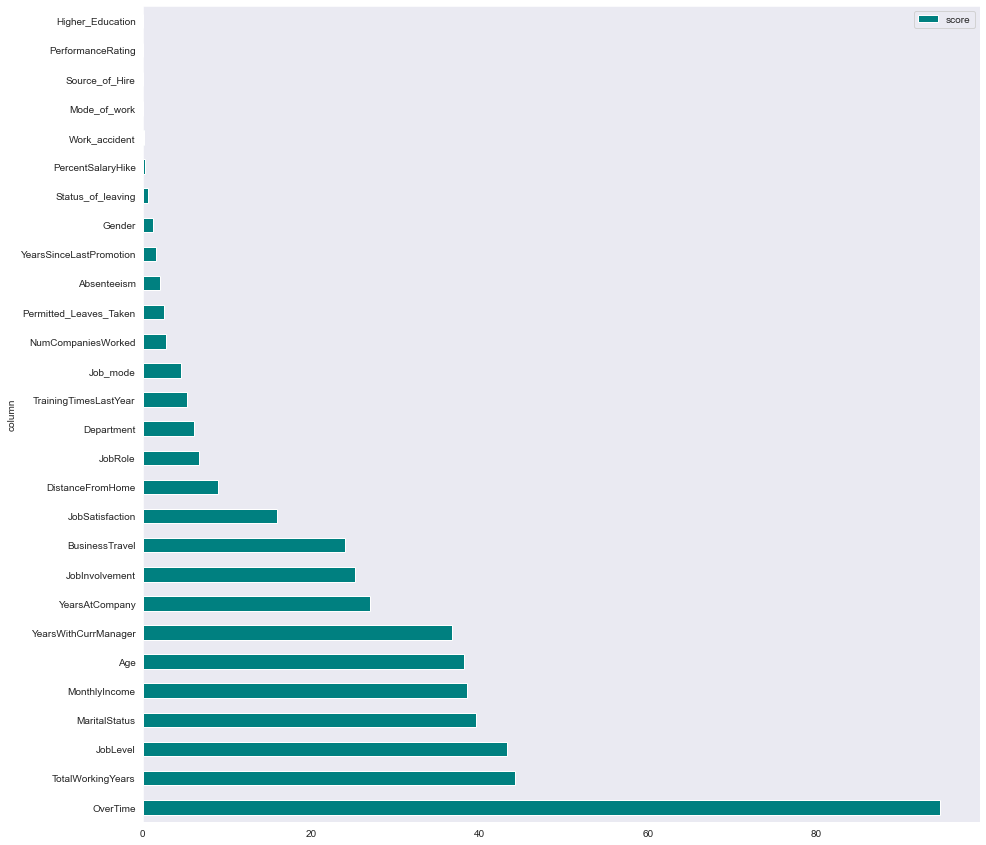

In [455]:
F_imp.plot.barh(y='score', figsize=(15,15), color= 'teal');

In [409]:
co_ma = data.corr()[['Burnout']]. round(2).sort_values(by = ['Burnout'], ascending = False).drop(['Burnout'])
co_ma

,Burnout
OverTime,0.25
MaritalStatus,0.16
BusinessTravel,0.13
DistanceFromHome,0.08
JobRole,0.07
Department,0.06
NumCompaniesWorked,0.04
Gender,0.03
Status_of_leaving,0.02
Work_accident,0.01


2. FEATURE REDUCTION: 
2.2. LINEAL COODEPENDENCE

In [410]:
data_numerical = data.drop(['BusinessTravel','Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Higher_Education', 'Status_of_leaving', 'Mode_of_work', 'Work_accident',
                            'Source_of_Hire', 'Job_mode', 'Burnout'],1)

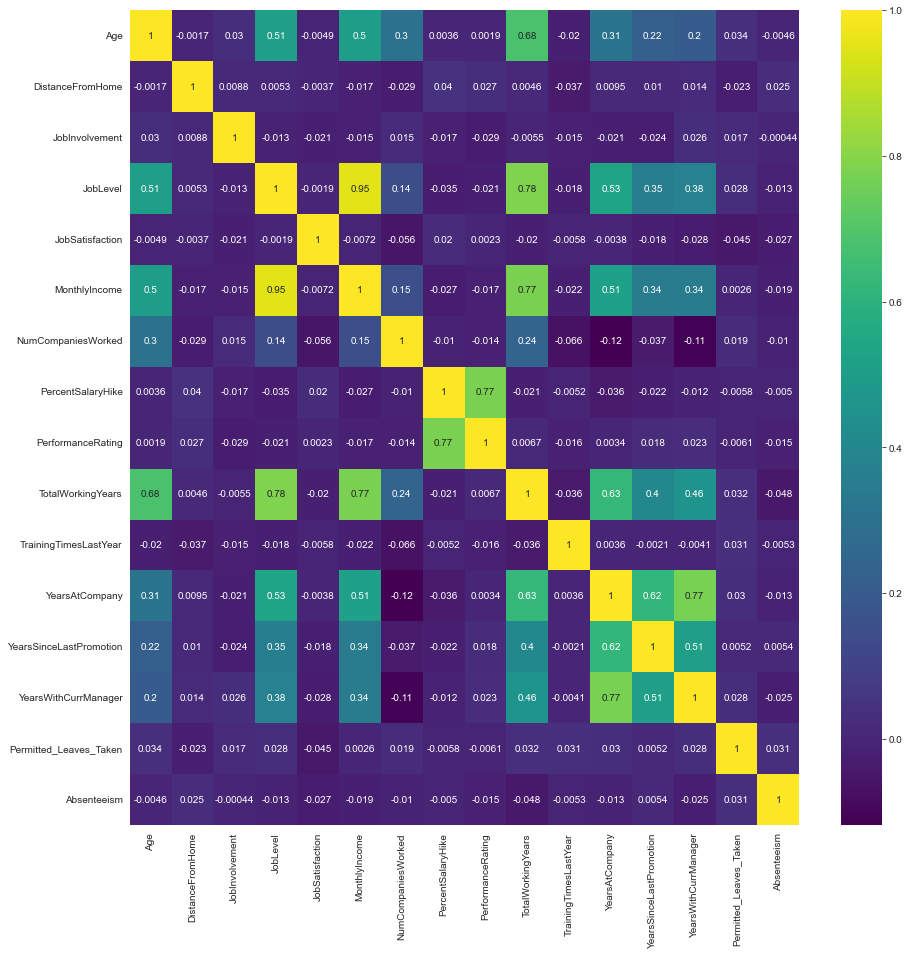

In [411]:
plt.figure(figsize=(15,15))
sns.heatmap(data_numerical.corr(),annot=True,cmap="viridis");

The following heatmap also takes into account the correlation between the categorical features using PhiK correlation 

interval columns not set, guessing: ['Age', 'Burnout', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education', 'Status_of_leaving', 'Mode_of_work', 'Permitted_Leaves_Taken', 'Absenteeism', 'Work_accident', 'Source_of_Hire', 'Job_mode']


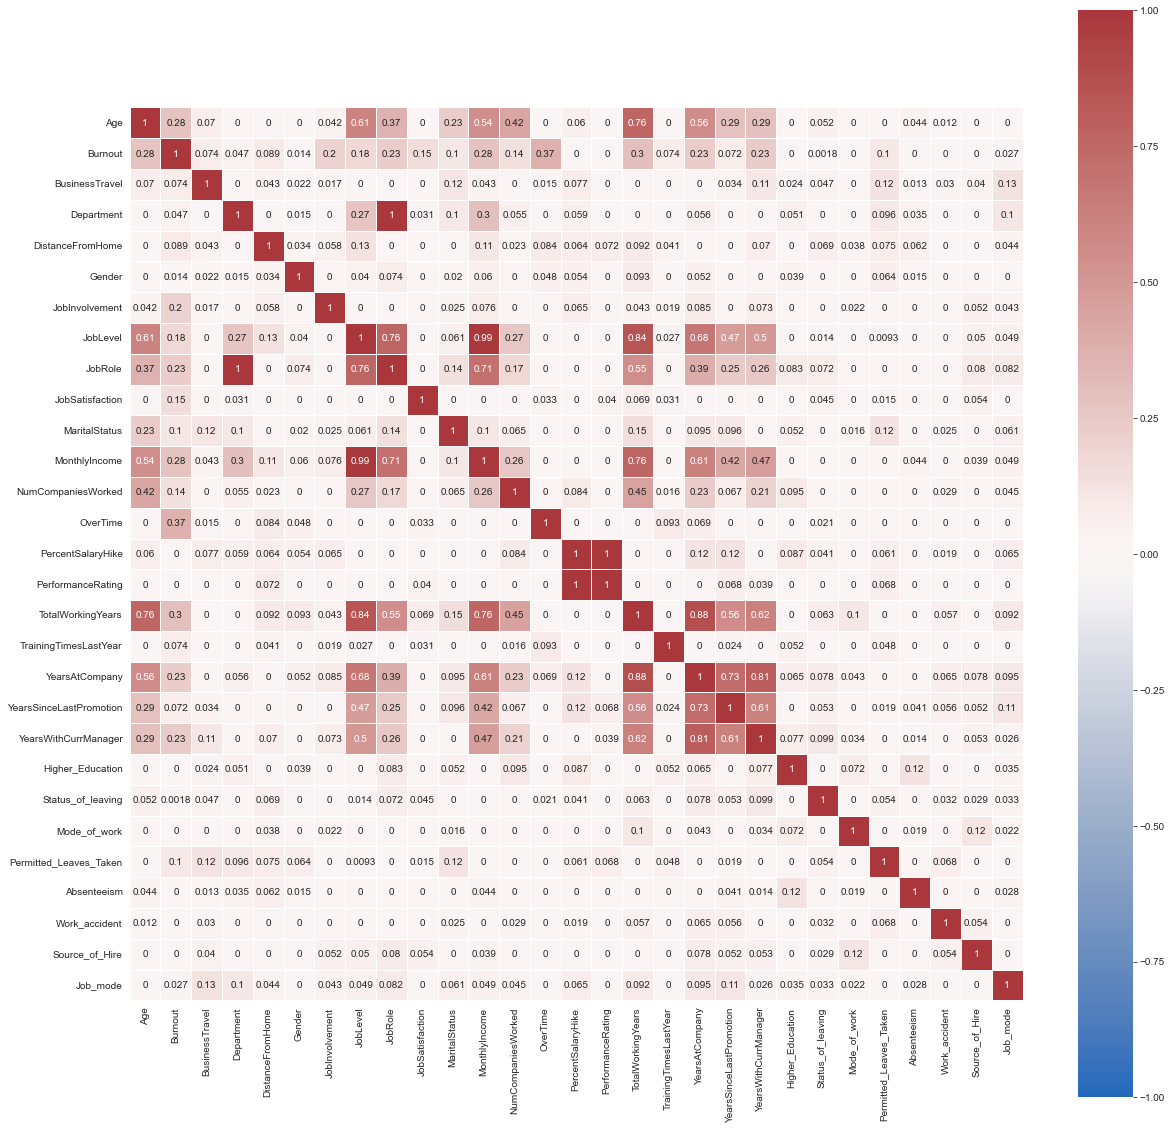

In [412]:
import phik
phik_matrix = data.phik_matrix()

plt.figure(figsize=(20,20))
sns.heatmap(phik_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.color_palette("vlag", as_cmap=True),
            square=True,
            annot=True,
            linewidths=.5);

There is lineal coodependence between:
    AGE Y JOB LOVEL; AGE Y TOTAL WORKING YEARS;
    DEPARTMENT Y MONTHLY INCOME;
    JOB LEVEL Y JOB ROLE; JOB LEVEL Y MONTHLY INCOME!!!!!!; JOB LEVEL Y TOTAL W.YEARS; JOB LEVEL Y YEARS AT COMPANY;
    JOB ROLE Y MONTHLY INCOME!!!;
    MONTHLY INCOME Y TOTAL W.YEARS;
    TOTAL W.YEARS Y YEARS AT COMPANY;
    YEARS AT COMPANY Y YEARS SINCE LAST PROMOTION; YEARS AT COMPANY Y YEARS WITH CURRENT MANAGER
    

    

In [413]:
#NEW FEATURES//NEW DATASET

3. RANDOM_OVER_SAMPLER

In [414]:
X = data[['OverTime', 'MaritalStatus', 'DistanceFromHome', 'JobRole', 'JobLevel', 'TotalWorkingYears', 'Age']]

y = data['Burnout']

In [415]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [416]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, Y_train)

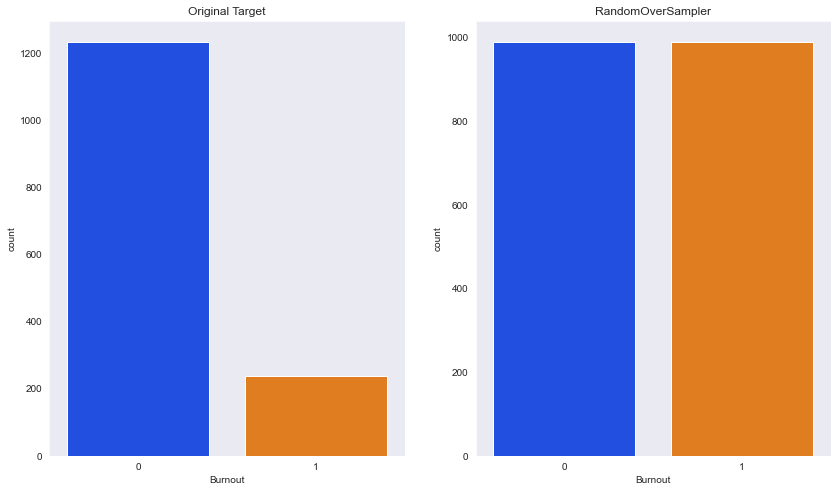

In [417]:
fig, axes = plt.subplots(1, 2, figsize= (14,8))

k = sns.countplot(ax=axes[0], x ='Burnout', data = data, palette='bright')
axes[0].set_title('Original Target')


r = sns.countplot(ax=axes[1], x =  y_train_ros, data = data, palette='bright')
axes[1].set_title('RandomOverSampler');

---------------------------------------------

In [418]:
#Modelos de prueba

In [419]:
#REGRESIÓN LOGÍSTICA

Accuracy_score: 0.7210884353741497
Acierto: 72.11 %
Error: 27.89 %
Confusion_matrix: [[174  69]
 [ 13  38]]
Recall_score: 0.355
F1_score: 0.481
Roc_auc_score: 0.7305737109658679


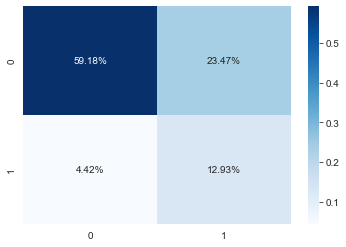

In [420]:
model = linear_model.LogisticRegression(max_iter = 1000)
model.fit(X_train_ros, y_train_ros)
predictions = model.predict(X_test)
print('Accuracy_score:', accuracy_score(Y_test, predictions))
acierto = accuracy_score(Y_test, predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix = confusion_matrix(Y_test, predictions)
print('Confusion_matrix:', c_matrix)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(predictions, Y_test), 3))
print("F1_score:", round(f1_score(predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, predictions))
Recall_Reg_log = round(recall_score(predictions, Y_test), 3)
Roc_Reg_log =  round(roc_auc_score(Y_test, predictions), 3)
FNreg_Reg_log = 13
TPreg_Reg_log = 38

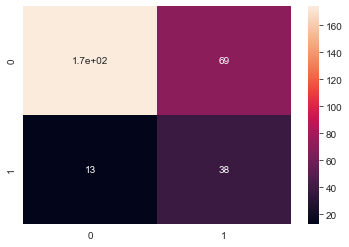

In [421]:
sns.heatmap(c_matrix, annot=True);

In [422]:
#RANDOM FOREST CLASSIFIER. POR AHORA ES EL MEJOR SEGUIDO DE LA REG.LOG

Accuracy_score: 0.7891156462585034
Acierto: 78.91 %
Error: 21.09 %
Confusion_matrix: [[198  45]
 [ 17  34]]
Recall_score: 0.43
F1_score: 0.523
Roc_auc_score: 0.7407407407407407


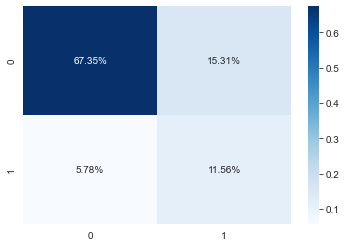

In [423]:
rnd_clf = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 20, random_state= 42) 

rnd_clf.fit(X_train_ros, y_train_ros)

y_pred_rf = rnd_clf.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, y_pred_rf))
acierto = accuracy_score(Y_test, y_pred_rf)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
print('Confusion_matrix:', c_matrix_rf)
sns.heatmap(c_matrix_rf/np.sum(c_matrix_rf), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(y_pred_rf, Y_test), 3))
print("F1_score:", round(f1_score(y_pred_rf, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, y_pred_rf))
Recall_RandomForest =  round(recall_score(y_pred_rf, Y_test), 3)
Roc_RandomForest =  round(roc_auc_score(Y_test, y_pred_rf), 3)
FN_RandomForest = 17
TP_RandomForest = 34

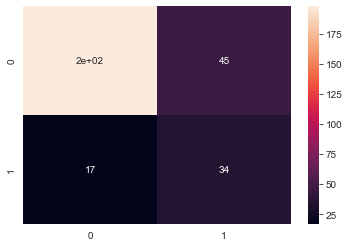

In [424]:
sns.heatmap(c_matrix_rf, annot=True);

In [425]:
#DECISION TREE

Accuracy_score: 0.7619047619047619
Acierto: 76.19 %
Error: 23.81 %
Confusion_matrix: [[206  37]
 [ 33  18]]
Recall_score: 0.327
F1_score: 0.34
Roc_auc_score: 0.6003389009924959


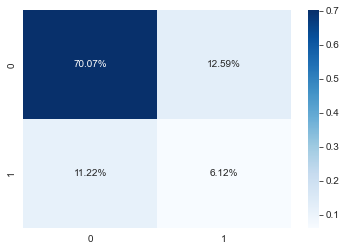

In [426]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_ros, y_train_ros)
dtc_predictions = dtc.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, dtc_predictions))
acierto = accuracy_score(Y_test, dtc_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_dtc = confusion_matrix(Y_test, dtc_predictions)
print('Confusion_matrix:', c_matrix_dtc)
sns.heatmap(c_matrix_dtc/np.sum(c_matrix_dtc), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(dtc_predictions, Y_test), 3))
print("F1_score:", round(f1_score(dtc_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, dtc_predictions))
Recall_DecisionTree = round(recall_score(dtc_predictions, Y_test), 3)
Roc_DecesionTree =  round(roc_auc_score(Y_test, dtc_predictions), 3)
FN_DecesionTree = 30
TP_DecesionTree = 21

In [427]:
#KNN CON GRIDSEARCH

In [428]:
knn_grid = KNeighborsClassifier()

parameters = {'n_neighbors': np.arange(0,41, 1)
              }

knn_gridsearch = GridSearchCV(knn_grid, parameters, cv = 5, scoring= 'recall')

knn_gridsearch.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])},
             scoring='recall')

In [429]:
knn_gridsearch.best_params_

{'n_neighbors': 1}

In [430]:
n_neighbors = 1

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_ros, y_train_ros)
knn_predictions = knn.predict(X_test)


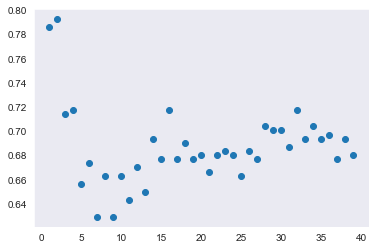

In [431]:
k_range = range(1, 40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_ros, y_train_ros)
    
    scores.append(knn.score(X_test, Y_test))

plt.scatter(k_range, scores);

Accuracy_score: 0.7857142857142857
Acierto: 78.57 %
Error: 21.43 %
Confusion_matrix: [[215  28]
 [ 35  16]]
Recall_score: 0.364
F1_score: 0.337
Roc_auc_score: 0.5992495763737593


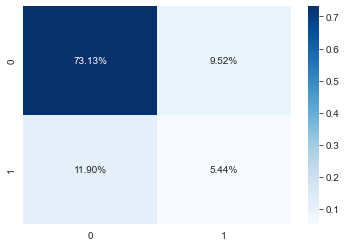

In [432]:
print('Accuracy_score:', accuracy_score(Y_test, knn_predictions))
acierto = accuracy_score(Y_test, knn_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_knn = confusion_matrix(Y_test, knn_predictions)
print('Confusion_matrix:', c_matrix_knn)
sns.heatmap(c_matrix_knn/np.sum(c_matrix_knn), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(knn_predictions, Y_test), 3))
print("F1_score:", round(f1_score(knn_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, knn_predictions))
Recall_KNN = round(recall_score(knn_predictions, Y_test), 3)
Roc_KNN =  round(roc_auc_score(Y_test, knn_predictions), 3)
FN_KNN = 35
TP_KNN = 16

In [433]:
#SVM ????????

In [434]:
'''svm_cla= svm.LinearSVC(C=3, loss='hinge', max_iter=10000)
svm_cla.fit(X_train_ros, y_train_ros)
svm_predictions=svm_cla.predict(Y_test)

print('Accuracy_score:', accuracy_score(Y_test, svm_predictions))
acierto = accuracy_score(Y_test, svm_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_svm = confusion_matrix(Y_test, svm_predictions)
print('Confusion_matrix:', c_matrix_svm)
sns.heatmap(c_matrix_svm/np.sum(c_matrix_svm), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(svm_predictions, Y_test), 3))
print("F1_score:", round(f1_score(svm_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, svm_predictions))'''



'svm_cla= svm.LinearSVC(C=3, loss=\'hinge\', max_iter=10000)\nsvm_cla.fit(X_train_ros, y_train_ros)\nsvm_predictions=svm_cla.predict(Y_test)\n\nprint(\'Accuracy_score:\', accuracy_score(Y_test, svm_predictions))\nacierto = accuracy_score(Y_test, svm_predictions)\nerror = 1 - acierto\nprint("Acierto:", round(acierto*100, 2), "%")\nprint("Error:", round(error*100, 2), "%")\nc_matrix_svm = confusion_matrix(Y_test, svm_predictions)\nprint(\'Confusion_matrix:\', c_matrix_svm)\nsns.heatmap(c_matrix_svm/np.sum(c_matrix_svm), annot=True, \n            fmt=\'.2%\', cmap=\'Blues\');\nprint("Recall_score:", round(recall_score(svm_predictions, Y_test), 3))\nprint("F1_score:", round(f1_score(svm_predictions, Y_test), 3))\nprint(\'Roc_auc_score:\', roc_auc_score(Y_test, svm_predictions))'

In [435]:
#ENSEMBLES

In [436]:
#ADABOOST:  ES EL MEJOR, GUARDARLO

Accuracy_score: 0.7380952380952381
Acierto: 73.81 %
Error: 26.19 %
Confusion_matrix: [[177  66]
 [ 11  40]]
Recall_score: 0.377
F1_score: 0.51
Roc_auc_score: 0.7563543936092956


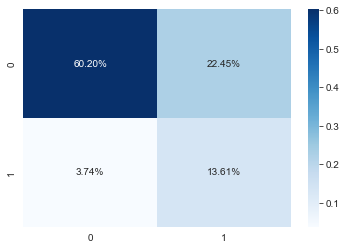

In [437]:
estimator = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(base_estimator=estimator,
                            n_estimators=50,
                            random_state=42)

ada_clf.fit(X_train_ros, y_train_ros)
ada_predictions = ada_clf.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, ada_predictions))
acierto = accuracy_score(Y_test, ada_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_ada = confusion_matrix(Y_test, ada_predictions)
print('Confusion_matrix:', c_matrix_ada)
sns.heatmap(c_matrix_ada/np.sum(c_matrix_ada), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(ada_predictions, Y_test), 3))
print("F1_score:", round(f1_score(ada_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, ada_predictions))
Recall_Adaboost = round(recall_score(ada_predictions, Y_test), 3)
Roc_Adaboost =  round(roc_auc_score(Y_test, ada_predictions),3)
FN_Adaboost = 11
TP_Adaboost = 40

In [438]:
#GRADIENT BOOSTING

Accuracy_score: 0.8061224489795918
Acierto: 80.61 %
Error: 19.39 %
Confusion_matrix: [[217  26]
 [ 31  20]]
Recall_score: 0.435
F1_score: 0.412
Roc_auc_score: 0.6425804889857177


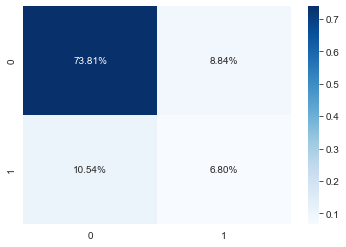

In [439]:
gbct = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 random_state=42)
gbct.fit(X_train_ros, y_train_ros)
gbct_predictions = gbct.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, gbct_predictions))
acierto = accuracy_score(Y_test, gbct_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_gbct= confusion_matrix(Y_test, gbct_predictions)
print('Confusion_matrix:', c_matrix_gbct)
sns.heatmap(c_matrix_gbct/np.sum(c_matrix_gbct), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(gbct_predictions, Y_test), 3))
print("F1_score:", round(f1_score(gbct_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, gbct_predictions))
Recall_GradientBoost = round(recall_score(gbct_predictions, Y_test), 3)
Roc_GradientBoost = round(roc_auc_score(Y_test, gbct_predictions), 3)
FN_GradientBoost = 31
TP_GradientBoost = 20

In [440]:
#XGBOOST

[17:46:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy_score: 0.8061224489795918
Acierto: 80.61 %
Error: 19.39 %
Confusion_matrix: [[217  26]
 [ 31  20]]
Recall_score: 0.453
F1_score: 0.504
Roc_auc_score: 0.7122972645848462


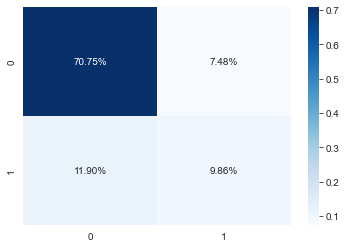

In [441]:
xgb_clas = xgboost.XGBRFClassifier(random_state=42,n_estimators=100)
xgb_clas.fit(X_train_ros, y_train_ros)
xgb_predictions = xgb_clas.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, xgb_predictions))
acierto = accuracy_score(Y_test, xgb_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_xgb= confusion_matrix(xgb_predictions, Y_test )
print('Confusion_matrix:', c_matrix_gbct)
sns.heatmap(c_matrix_xgb/np.sum(c_matrix_xgb), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(xgb_predictions, Y_test), 3))
print("F1_score:", round(f1_score(xgb_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, xgb_predictions))
Recall_XGBoost = round(recall_score(xgb_predictions, Y_test), 3)
Roc_XGBoost =  round(roc_auc_score(Y_test, xgb_predictions), 3)
FN_XGBoost = 31
TP_XGBoost = 20

In [442]:
#CATBOOST

Accuracy_score: 0.8095238095238095
Acierto: 80.95 %
Error: 19.05 %
Confusion_matrix: [[213  30]
 [ 26  25]]
Recall_score: 0.455
F1_score: 0.472
Roc_auc_score: 0.6833696441539578


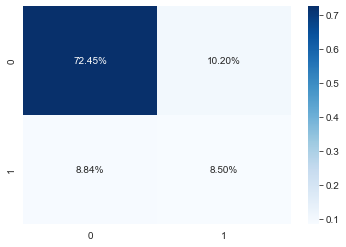

In [443]:
cbc_clas = CatBoostClassifier(silent=True)

cbc_clas.fit(X_train_ros, y_train_ros)
cbc_predictions = cbc_clas.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, cbc_predictions))
acierto = accuracy_score(Y_test, cbc_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_cbc= confusion_matrix(Y_test, cbc_predictions)
print('Confusion_matrix:', c_matrix_cbc)
sns.heatmap(c_matrix_cbc/np.sum(c_matrix_cbc), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(cbc_predictions, Y_test), 3))
print("F1_score:", round(f1_score(cbc_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, cbc_predictions))
Recall_CatBoost = round(recall_score(cbc_predictions, Y_test), 3)
Roc_CatBoost =  round(roc_auc_score(Y_test, cbc_predictions), 3)
FN_CatBoost = 26
TP_CatBoost = 25


In [444]:
scores = {
    'Model': ['Reg.log', 'RandomForest', 'DecisionTree', 'KNN', 'AdaBoost', 'GradientBoost', 'XGBoost', 'CatBoost'],
    'Recall_score':  [Recall_Reg_log, Recall_RandomForest, Recall_DecisionTree, Recall_KNN, Recall_Adaboost, Recall_GradientBoost, Recall_XGBoost, Recall_CatBoost],
    'Roc_auc_score': [Roc_Reg_log, Roc_RandomForest, Roc_DecesionTree, Roc_KNN, Roc_Adaboost, Roc_GradientBoost, Roc_XGBoost, Roc_CatBoost],
    'FN': [13, 17, 30, 35, 11, 31, 31, 26],
    'TP': [38, 34, 21, 16, 40, 20, 20, 25]
}
scores_df = pd.DataFrame(scores)
scores_df

,Model,Recall_score,Roc_auc_score,FN,TP
0,Reg.log,0.355,0.731,13,38
1,RandomForest,0.430,0.741,17,34
2,DecisionTree,0.327,0.600,30,21
3,KNN,0.364,0.599,35,16
4,AdaBoost,0.377,0.756,11,40
5,GradientBoost,0.435,0.643,31,20
6,XGBoost,0.453,0.712,31,20
7,CatBoost,0.455,0.683,26,25


In [445]:
scores_df.sort_values('TP',ascending=False)

,Model,Recall_score,Roc_auc_score,FN,TP
4,AdaBoost,0.377,0.756,11,40
0,Reg.log,0.355,0.731,13,38
1,RandomForest,0.430,0.741,17,34
7,CatBoost,0.455,0.683,26,25
2,DecisionTree,0.327,0.600,30,21
5,GradientBoost,0.435,0.643,31,20
6,XGBoost,0.453,0.712,31,20
3,KNN,0.364,0.599,35,16


In [446]:
scores_df.sort_values('Recall_score',ascending=False)

,Model,Recall_score,Roc_auc_score,FN,TP
7,CatBoost,0.455,0.683,26,25
6,XGBoost,0.453,0.712,31,20
5,GradientBoost,0.435,0.643,31,20
1,RandomForest,0.430,0.741,17,34
4,AdaBoost,0.377,0.756,11,40
3,KNN,0.364,0.599,35,16
0,Reg.log,0.355,0.731,13,38
2,DecisionTree,0.327,0.600,30,21


In [447]:
scores_df.sort_values('Roc_auc_score',ascending=False)

,Model,Recall_score,Roc_auc_score,FN,TP
4,AdaBoost,0.377,0.756,11,40
1,RandomForest,0.430,0.741,17,34
0,Reg.log,0.355,0.731,13,38
6,XGBoost,0.453,0.712,31,20
7,CatBoost,0.455,0.683,26,25
5,GradientBoost,0.435,0.643,31,20
2,DecisionTree,0.327,0.600,30,21
3,KNN,0.364,0.599,35,16


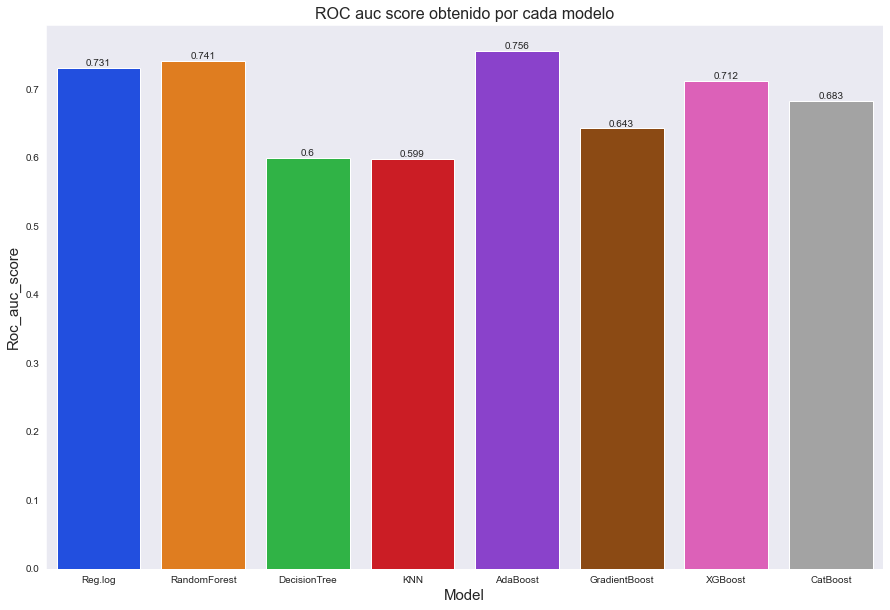

In [448]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Model', y='Roc_auc_score', data=scores, palette='bright')
ax.bar_label(ax.containers[0])
plt.title('ROC auc score obtenido por cada modelo', fontsize=16)
plt.xlabel("Model", size=15)
plt.ylabel('Roc_auc_score', size=15);